### You can run this notebook at Colab by clicking here:

<a target="_blank" href="https://colab.research.google.com/github/NMRLipids/Databank/blob/main/Scripts/AnalyzeDatabank/stats.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>

# Statistics of NMRlipids databank

This notebook plots:
1. Distributions of simulation lengths, number of atoms and trajectory sizes
2. Distribution of number of lipid components
3. Available single component bilayers and binary lipid mixtures
4. Pie diagram of temperatures

# Initializing databank

In [ ]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


if 'google.colab' in sys.modules:
    !git clone https://github.com/NMRlipids/Databank
    %cd Databank
    !sed -i '/numpy/s/^/# /' Scripts/DatabankLib/requirements.txt
    !pip3 install .
    os.environ["NMLDB_ROOT_PATH"] = "/content/Databank"

# This enales the access to functions defined in the NMRlipids databank.
from DatabankLib.core import initialize_databank, lipids_set

systems = initialize_databank()

Databank initialized from the folder: /home/comcon1/repo/Databank/Data/Simulations


# Plot distributions of simulation lengths, number of atoms and trajectory sizes

Number of entries:  806
Total size of trajectories:  2250.781806238927 Gb
Total time of trajectories:  425805.3684460995 ns


Text(0, 0.5, 'Distribution')

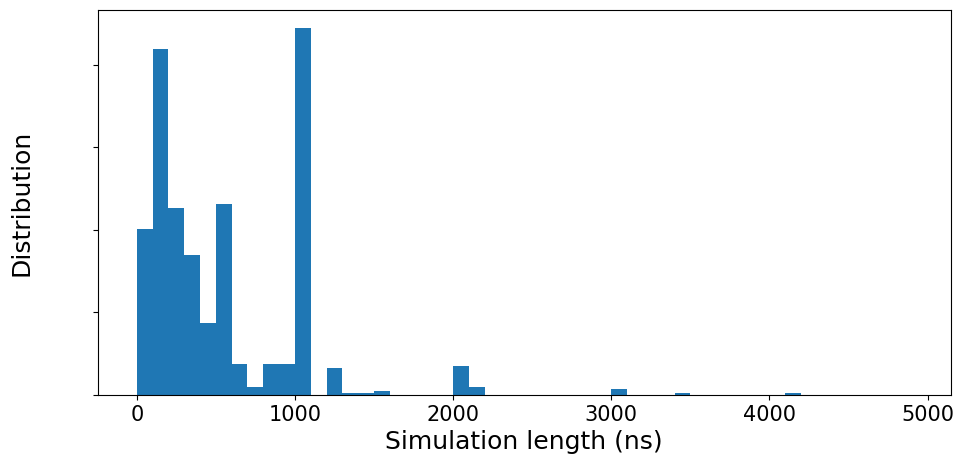

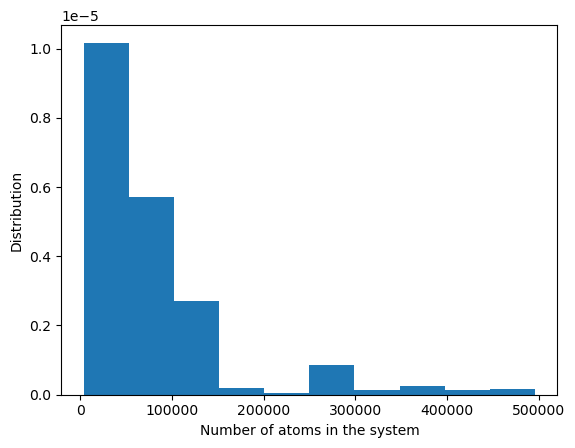

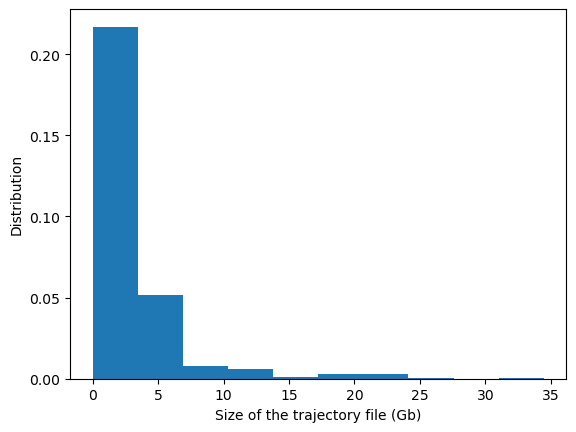

In [2]:
SimulationLengths = []
NumberOfAtoms = []
SizeOfTrajectories = []

# Loop over simulations in the Databank
for system in systems:
    SimulationLengths.append(system['TRJLENGTH']*0.001)
    NumberOfAtoms.append(system['NUMBER_OF_ATOMS'])
    SizeOfTrajectories.append(system['TRAJECTORY_SIZE']/(1024*1024*1024))
    
print("Number of entries: ",len(systems))
print("Total size of trajectories: ",str(np.sum(SizeOfTrajectories)) + ' Gb')
print("Total time of trajectories: ",str(np.sum(SimulationLengths)) + ' ns')

plt.figure(figsize=(11,5))
distSIMl = plt.hist(SimulationLengths, density=True,bins=np.arange(0,5000,100))
plt.xlabel('Simulation length (ns)', fontsize=18)
plt.ylabel('Distribution', fontsize=18)
plt.yticks(color='w')
plt.xticks(fontsize=15)
plt.figure()
distNatoms = plt.hist(NumberOfAtoms, density=True)
plt.xlabel('Number of atoms in the system')
plt.ylabel('Distribution')
plt.figure()
disttrjSIZE = plt.hist(SizeOfTrajectories, density=True)
plt.xlabel('Size of the trajectory file (Gb)')
plt.ylabel('Distribution')

# Plot distribution of number of lipid components

<Figure size 640x480 with 0 Axes>

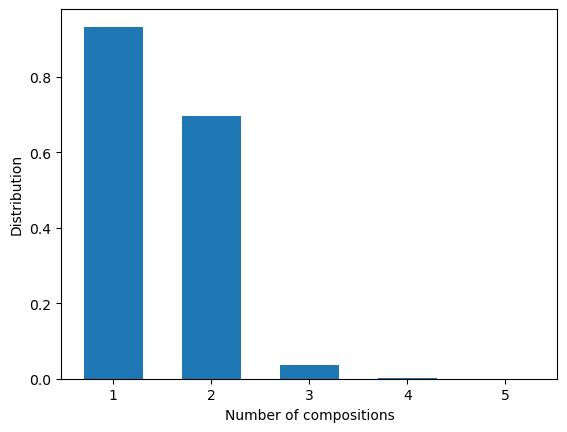

<Figure size 640x480 with 0 Axes>

In [ ]:
Nlipids = []

# Loop over simulations in the Databank
for system in systems:
    NlipidsTMP = 0
    for molecule in system['COMPOSITION']:
        if molecule in lipids_set:
            NlipidsTMP += 1
    Nlipids.append(NlipidsTMP)
    
bins=[0.7,1.3, 1.7,2.3, 2.7,3.3, 3.7,4.3, 4.7, 5.3]
distNlipids = plt.hist(Nlipids, density=True, range=[0,6], bins=bins)
plt.xlabel('Number of compositions')
plt.ylabel('Distribution')
plt.figure()

# Plot available single component bilayers and binary lipid mixtures

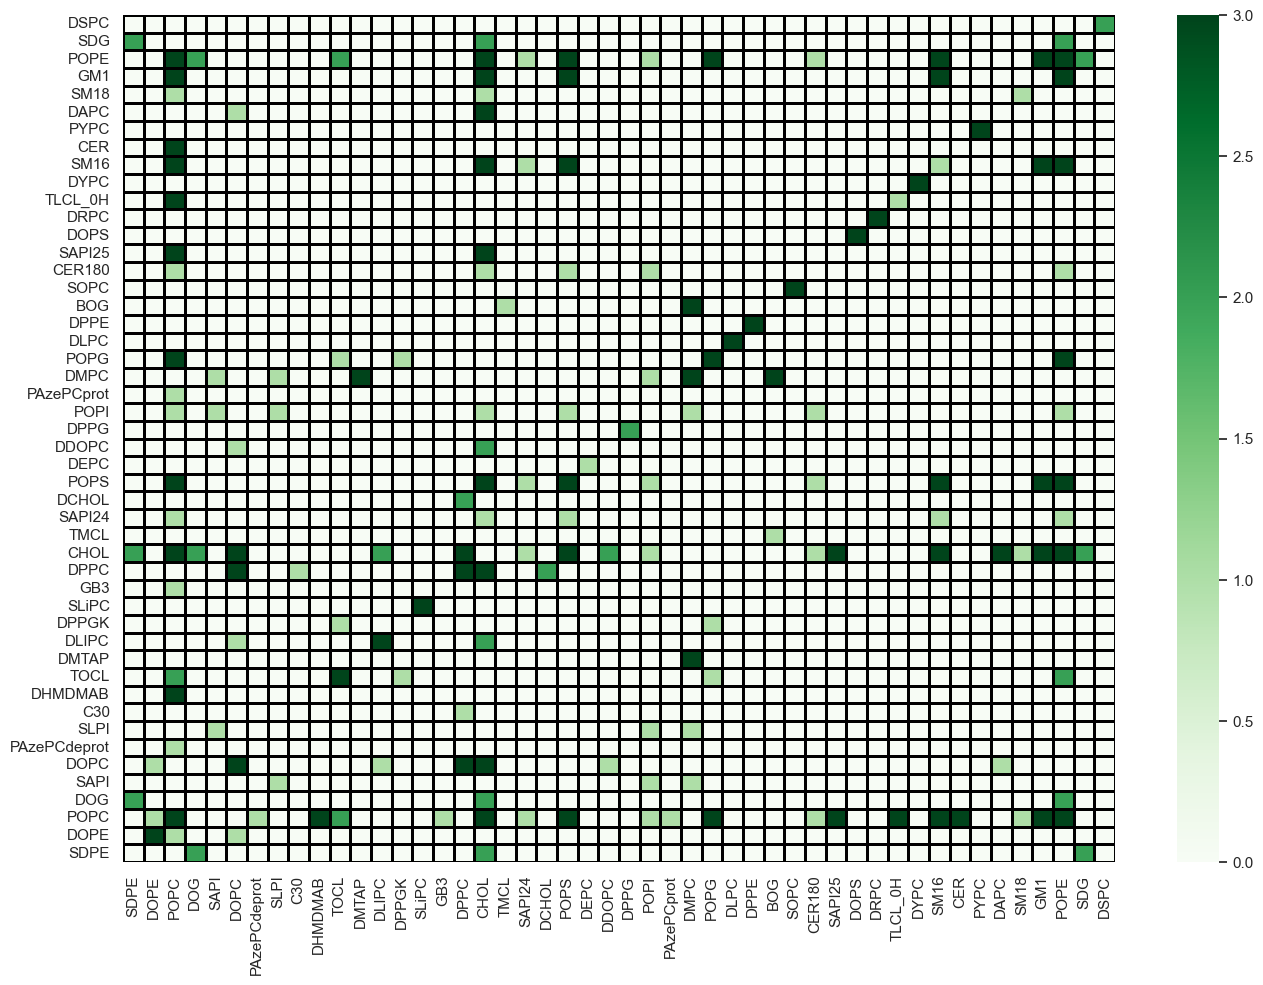

In [14]:
compositions = {}
for lipid in lipids_set:
    compositions[lipid.name] = {}

for key in compositions:
    for lipid in lipids_set:
        compositions[key][lipid.name] = 0


# Loop over simulations in the Databank
for system in systems:
    lipids_in_system = []
    for mol in system['COMPOSITION']:
        if mol in lipids_set:
            lipids_in_system.append(mol)
    
    for lipid1 in lipids_in_system:
        for lipid2 in lipids_in_system:
            if lipid1 != lipid2:
                compositions[lipid1][lipid2] += 1
            #print(mol,system['COMPOSITION'][mol]['COUNT'])
            #compositions[mol] =
    
    if len(lipids_in_system) == 1:
        lipid = lipids_in_system[0]
        compositions[lipid][lipid] += 1

df = pd.DataFrame(compositions)
z=df.values

sns.set(rc = {'figure.figsize':(16,11)})
ax = sns.heatmap(df, cmap = 'Greens', vmin =0, vmax = 3, linewidths = 1, linecolor = 'black')
ax.invert_yaxis()

# Plotting pie diagram of temperatures

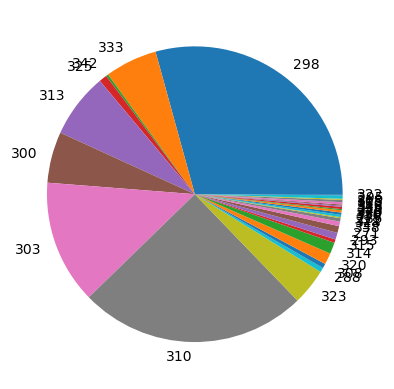

In [8]:
#db_data.pie_temperature()
import collections
temps = [ int(float(system['TEMPERATURE'])) for system in systems]
counter = collections.Counter(temps)
plt.pie(counter.values(),labels=counter.keys());

<Figure size 640x480 with 0 Axes>

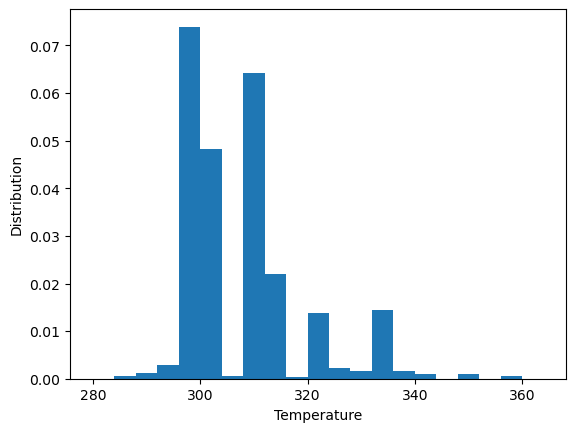

<Figure size 640x480 with 0 Axes>

In [9]:
distTemps = plt.hist(temps, density=True, bins=np.arange(280,365,4))
plt.xlabel('Temperature')
plt.ylabel('Distribution')
plt.figure()

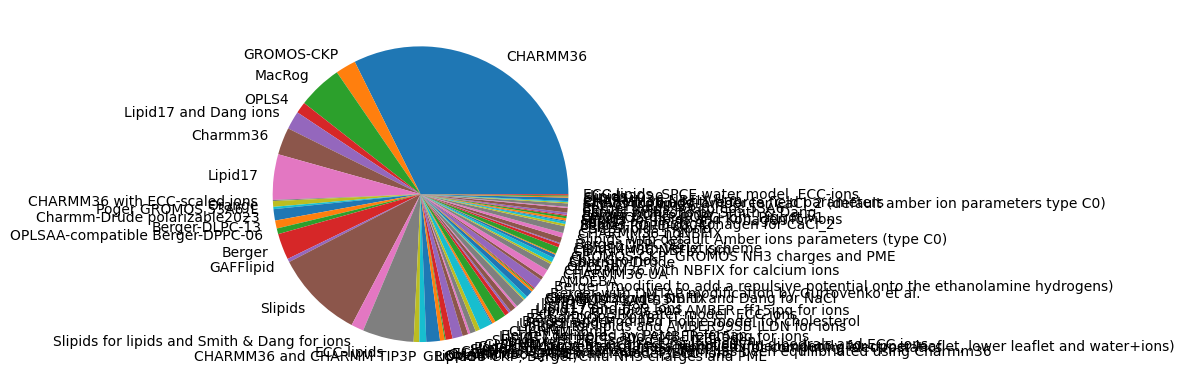

In [11]:

temps = [ s['FF'] for s in systems if 'FF' in s]
counter = collections.Counter(temps)
plt.pie(counter.values(),labels=counter.keys());

Force field information missing froma7f/9f3/a7f9f36feaa77791483dadb0157f86a6a519f2c3/a30f01e8771c44dc59b78753d1dd27ca67920e38/
Force field information missing fromc04/cdb/c04cdb61143bb72ba2ddee11599e6bbfaf6cb211/a31f42800216d84d2242eae2af8ac2cbd6b033ee/
{'Orange': 5, 'Poger': 4, 'GAFFlipid': 3, 'OpenFF': 4, 'Ulmschneider': 2, 'GROMOS 43A1-S3': 2, 'OPLS3e': 4, 'Chiu Gromos': 1, 'ECC-CHARMM36': 3}


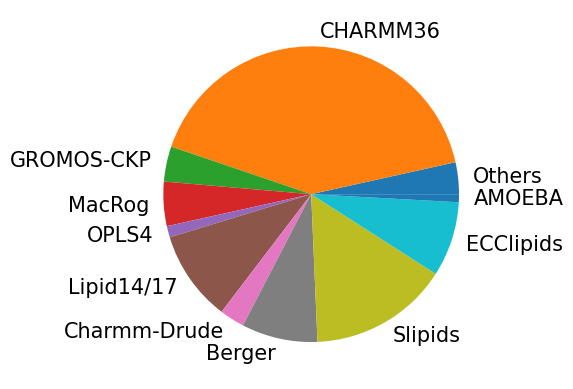

In [12]:
ffs = []

for system in systems:
    try:
        ff = system['FF']
    except:
        print('Force field information missing from' + system['path'])
    
    if 'GROMOS-CKP' in ff or 'gromos-ckp' in ff:
        ffs.append('GROMOS-CKP')
    elif 'Charmm-Drude' in ff:
        ffs.append('Charmm-Drude')
    elif 'Berger' in ff:
        ffs.append('Berger')    
    elif 'Slipids' in ff or 'slipids' in ff:
        ffs.append('Slipids')    
    elif 'lipid17ecc' in ff or 'ECC-lipids' in ff:
        ffs.append('ECClipids')
    elif 'ECC-CHARMM36' in ff:
        ffs.append(ff)
    elif 'CHARMM36' in ff or 'Charmm36' in ff:
        ffs.append('CHARMM36')
    elif 'Lipid14' in ff or 'Lipid17' in ff or 'lipid17' in ff:
        ffs.append('Lipid14/17')
    elif 'Poger' in ff:
        ffs.append('Poger')
    else:
        ffs.append(ff)
    
counter = collections.Counter(ffs)
several = {}
several['Others'] = 0
less = {}
for i in counter:
    if counter[i] > 5:
        several[i] = counter[i]
    else:
        several['Others'] += counter[i] 
        less[i] = counter[i]
#plt.pie(counter.values(),labels=counter.keys(), textprops={'fontsize': 15});
plt.pie(several.values(),labels=several.keys(), textprops={'fontsize': 15});
#plt.savefig('../../../DataBankManuscriptText/Figures/FFpie.pdf', bbox_inches='tight')
print(less)

{'DPPE': 3, 'TMCL': 1, 'BOG': 4, 'CER': 5, 'DOG': 4, 'DYPC': 3, 'SAPI25': 6, 'DLIPC': 6, 'SDPE': 4, 'PYPC': 3, 'DSPC': 2, 'DRPC': 3, 'TLCL_0H': 4, 'DCHOL': 2, 'SLiPC': 3, 'SM18': 2, 'DPPG': 2, 'POPI': 2, 'CER180': 1, 'DDOPC': 2, 'DEPC': 1, 'SDG': 4, 'C30': 1, 'DPPGK': 1, 'GB3': 1, 'GM1': 3, 'SAPI': 1, 'SLPI': 1, 'PAzePCdeprot': 1, 'PAzePCprot': 1, 'SAPI24': 1}


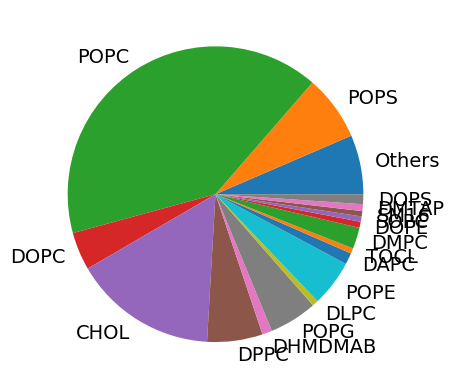

In [13]:
lipids = []
for system in systems:
    for lipid in system['COMPOSITION']:
        if lipid in lipids_set:
            lipids.append(lipid)
counter = collections.Counter(lipids)
several = {}
several['Others'] = 0
less = {}
for i in counter:
    if counter[i] > 6:
        several[i] = counter[i]
    else:
        several['Others'] += counter[i] 
        less[i] = counter[i]

#plt.figure(figsize=(11,5))
plt.pie(several.values(),labels=several.keys(), textprops={'fontsize': 14});
#plt.savefig('../../../DataBankManuscriptText/Figures/FFlipids.pdf', bbox_inches='tight')
print(less)